# Linear Regressions

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn import model_selection as ms
sklearn.set_config(print_changed_only=False)

import xgboost

import import_ipynb
from _Self_Written_Functions_Sheet import rmse

importing Jupyter notebook from _Self_Written_Functions_Sheet.ipynb


In [2]:
hp_full_strd = pd.read_csv('..\hp_2a_ranked_edited_dum_full_train.csv', index_col=0)
hp_full_strd

,LotFrontage,LotArea,Street,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-1/2 STORY PUD - ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YrSold_2006.0,YrSold_2007.0,YrSold_2008.0,YrSold_2009.0,YrSold_2010.0
0,0.150685,0.033420,1.0,0.0,1.0,0.666667,0.500,0.949275,0.88

In [3]:
hp_logsaleprice = pd.read_csv('..\hp_1a_no_imputation_logsaleprice.csv', index_col=0)
hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1453,12.072541
1454,12.254863
1455,12.493130
1456,11.864462


## Attempting Multilinear Regression

## Using hp_full_strd dataset

In [4]:
state = 0

# setting up train and test sets
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_full_strd,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

# Must flatten to fit
ytrain = ytrain.values.flatten()

# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

In [5]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

lm = LinearRegression()

# parameters to use
fitintercept = [True, False]
gparam_mlr_1 = {'fit_intercept': fitintercept}

# setting parameters
gs_mlr_1 = ms.GridSearchCV(lm, gparam_mlr_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_mlr_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_mlr_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr_1, ytrain, xtrain)) 
test_rmse.append(rmse(gs_mlr_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_mlr_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df

Wall time: 1.57 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,fit_intercept
0,0.945233,0.918374,0.092756,0.117616,-0.024859,False


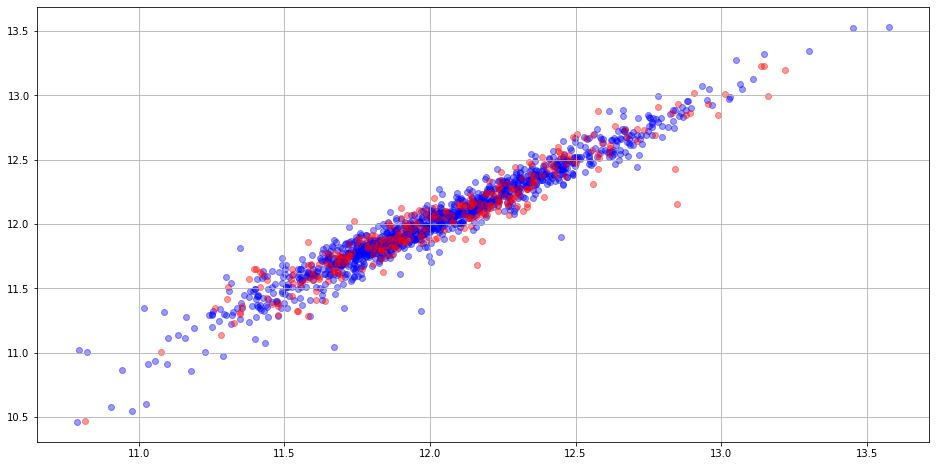

In [6]:
plt.figure(figsize=(16, 8))
plt.scatter(gs_mlr_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_mlr_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

## Trying with Lasso

In [7]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

lasso = Lasso(random_state=state, max_iter=1000000, selection='random', fit_intercept=True)

# parameters to use
alphas = np.linspace(1e-4, 2.5e-4, 30)
gparam_lasso_1 = {'alpha': alphas}

# setting parameters
gs_lasso_1 = ms.GridSearchCV(lasso, gparam_lasso_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_lasso_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_lasso_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_lasso_1, ytrain, xtrain))
test_rmse.append(rmse(gs_lasso_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_lasso_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lasso_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lasso_res_df = pd.DataFrame(lasso_list_results).T
lasso_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lasso_res_df = pd.concat([lasso_res_df, best_par_df], axis=1, sort=False)

lasso_res_df

Wall time: 1.59 s


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,alpha
0,0.935971,0.932771,0.100294,0.106741,-0.006447,0.00025


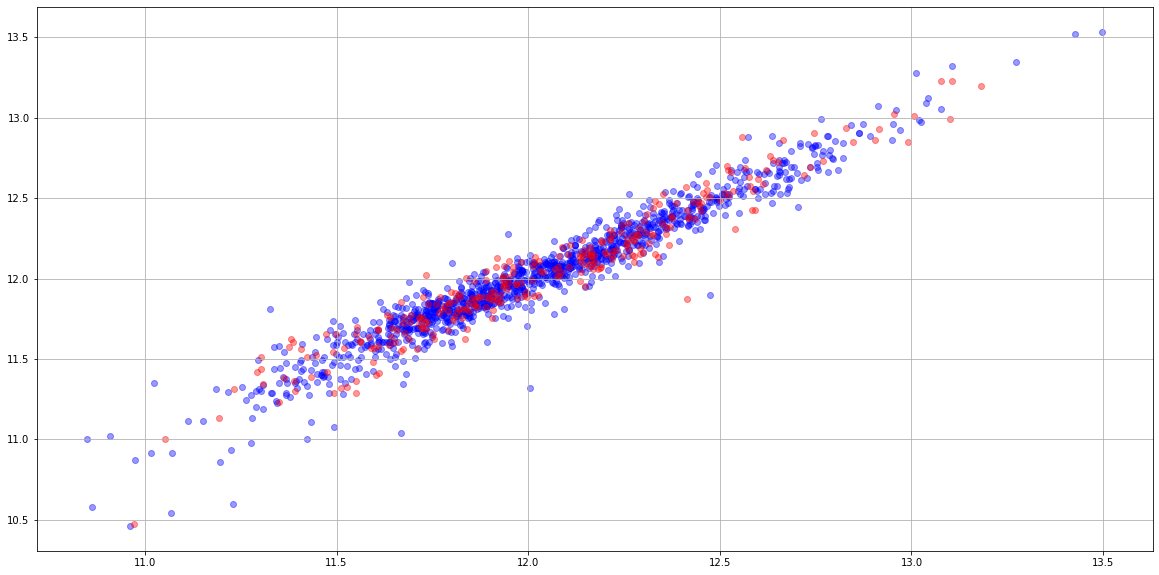

In [8]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_lasso_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

- we see underfitting

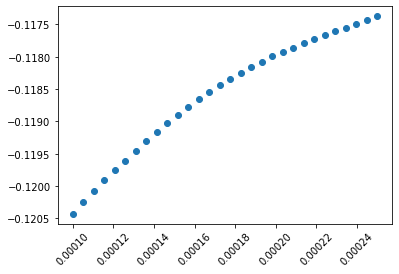

In [9]:
plt.xticks(rotation=45)
plt.scatter(gs_lasso_1.cv_results_['param_alpha'], gs_lasso_1.cv_results_['mean_test_score'])

## Using reduced DF hp_full_strd

In [10]:
lasso_coef_strd = pd.Series(gs_lasso_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(lasso_coef_strd.abs().sort_values(ascending=False).to_string())

GrLivArea                                                           1.241294
OverallQual                                                         0.442117
TotalBsmtSF                                                         0.314585
OverallCond                                                         0.274819
LotArea                                                             0.242023
BsmtFinSF1                                                          0.190836
MSZoning_FV                                                         0.180770
Functional                                                          0.169608
YearBuilt                                                           0.159549
MSZoning_RL                                                         0.140102
Neighborhood_StoneBr                                                0.117453
GarageCars                                                          0.117014
MSZoning_RH                                                         0.110254

In [11]:
lasso_coef_index_01 = [i for i, x in enumerate(lasso_coef_strd) if abs(x) > 0]

hp_lasso_strd_reduced = hp_full_strd.iloc[:,lasso_coef_index_01]

# hp_lasso_strd_reduced.to_csv('..\hp_lasso_strd_reduced.csv')
hp_lasso_strd_reduced

,LotFrontage,LotArea,Street,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea,Fence,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_Reg,LandContour_HLS,LotConfig_CulDSac,LotConfig_Inside,LandSlope_Mod,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,BldgType_2fmCon,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Gambrel,RoofMatl_Tar&Grv,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior2nd_BrkFace,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Heating_GasW,Heating_Grav,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MoSold_Aug,MoSold_Feb,MoSold_Jun,MoSold_May,MoSold_Nov,MoSold_Sep,SaleType_ConLD,SaleType_ConLI,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial,YrSold_2006.0,YrSold_2009.0,YrSold_2010.0
0,0.150685,0.033420,1.0,0.0,0.666667,0.500,0.949275,0.883333,0.122500,0.666667,0.8,0.25,1.000000,0.176060,0.000000,0.168008,1.00,1.0,0.109641,0.289015,0.333333,0.50,0.5,0.333333,0.666667,0.461538,1.000000,0.00,0.666667,0.4,0.368280,0.6,1.0,0.000000,0.082210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.202055,0.038795,1.0,0.0,0.555556,0.875,0.753623,0.433333,0.000000,0.333333,0.8,1.00,0.833333,0.243890,0.000000,0.247694,1.00,1.0,0.194917,0.194917,0.000000,0.50,0.0,0.333333,0.333333,0.307692,1.000000,0.25,0.666667,0.4,0.309140,0.6,1.0,0.209270,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.160959,0.046507,1.0,0.0,0.666667,0.500,0.934783,0.866667,0.101250,0.666667,0.8,0.50,1.000000,0.121197,0.000000,0.180569,1.00,1.0,0.123083,0.304978,0.333333,0.50,0.5,0.333333,0.666667,0.307692,1.000000,0.25,0.666667,0.4,0.408602,0.6,1.0,0.000000,0.056604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.133562,0.038561,1.0,0.0

## features that were kept with lasso

In [12]:
list(hp_lasso_strd_reduced.columns)

['LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'ScreenPorch',
 'PoolArea',
 'Fence',
 'MSSubClass_1-STORY 1945 & OLDER',
 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
 'MSSubClass_2-STORY 1945 & OLDER',
 'MSSubClass_2-STORY PUD - 1946 & NEWER',
 'MSSubClass_SPLIT FOYER',
 'MSSubClass_SPLIT OR MULTI-LEVEL',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotShape_Reg',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'LotConfig_Inside'

In [13]:
# columns that were dropped by lasso

lasso_coef_index_00 = [i for i, x in enumerate(lasso_coef_strd) if abs(x) == 0]
hp_lasso_strd_dropped = hp_full_strd.iloc[:, lasso_coef_index_00]
list(hp_lasso_strd_dropped.columns)

['Utilities',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtUnfSF',
 'Electrical',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'GarageYrBlt',
 'GarageCond',
 'EnclosedPorch',
 '3SsnPorch',
 'PoolQC',
 'MiscVal',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_1-1/2 STORY PUD - ALL AGES',
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_2-STORY 1946 & NEWER',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'LotShape_IR3',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_NPkVill',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_PosA',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'C

## using the lasso reduced dataset in multilinear regression

In [14]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

# setting up train_lso and test_lso sets
xtrain_lso, xtest_lso, ytrain_lso, ytest_lso = ms.train_test_split(hp_lasso_strd_reduced,
                                                                   hp_logsaleprice,
                                                                   test_size=0.2,
                                                                   random_state=0)

# Must flatten to fit
ytrain_lso = ytrain_lso.values.flatten()

lm = LinearRegression()

# parameters to use
fitintercept = [True, False]
gparam_mlr = {'fit_intercept': fitintercept}

# setting parameters
gs_mlr = ms.GridSearchCV(lm, gparam_mlr, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr.fit(xtrain_lso, ytrain_lso)

# setting up dataframe for results
train_scores.append(gs_mlr.best_estimator_.score(xtrain_lso, ytrain_lso))
test_scores.append(gs_mlr.best_estimator_.score(xtest_lso, ytest_lso))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr, ytrain_lso, xtrain_lso))
test_rmse.append(rmse(gs_mlr, ytest_lso, xtest_lso))

# add the best parameters to the df
best_par_list.append(gs_mlr.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'train_rmse', 'test_rmse', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df_sel2 = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_sel2

Wall time: 136 ms


,TrainScores,TestScores,train_rmse,test_rmse,DiffRMSE,fit_intercept
0,0.235177,0.231125,0.34663,0.360977,-0.014348,False


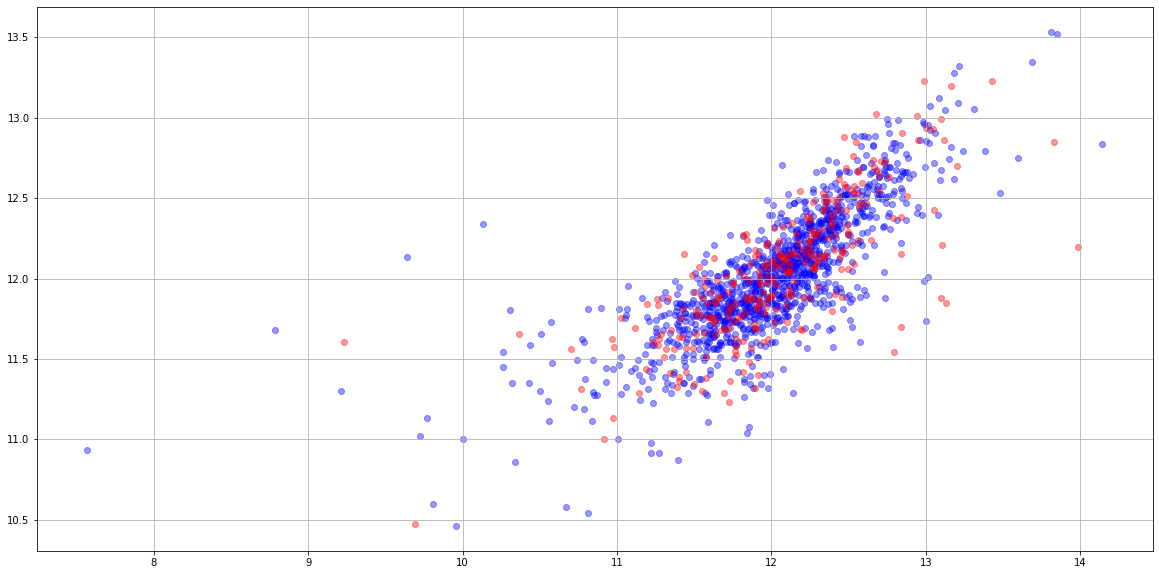

In [15]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr.best_estimator_.predict(xtrain_lso), ytrain_lso, color='blue', alpha=0.4)
plt.scatter(gs_mlr.best_estimator_.predict(xtest_lso), ytest_lso, color='red', alpha=0.4)
plt.grid(which='both')

## Trying w Ridge

In [16]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

ridge = Ridge(random_state=state, max_iter=10000, fit_intercept=True)

# parameters to use
# alphas = np.linspace(1e-4, 2.5e-4, 30) 'alpha': alphas,
fitintercept = [True, False]

gparam_ridge_1 = {'fit_intercept': fitintercept, 
                  'random_state': [state]}

# setting parameters
gs_ridge_1 = ms.GridSearchCV(ridge, gparam_ridge_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_ridge_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_ridge_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_ridge_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_ridge_1, ytrain, xtrain))
test_rmse.append(rmse(gs_ridge_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_ridge_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
ridge_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
ridge_res_df = pd.DataFrame(ridge_list_results).T
ridge_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
ridge_res_df = pd.concat([ridge_res_df, best_par_df], axis=1, sort=False)

ridge_res_df

Wall time: 155 ms


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,fit_intercept,random_state
0,0.941886,0.925823,0.095549,0.112121,-0.016572,True,0


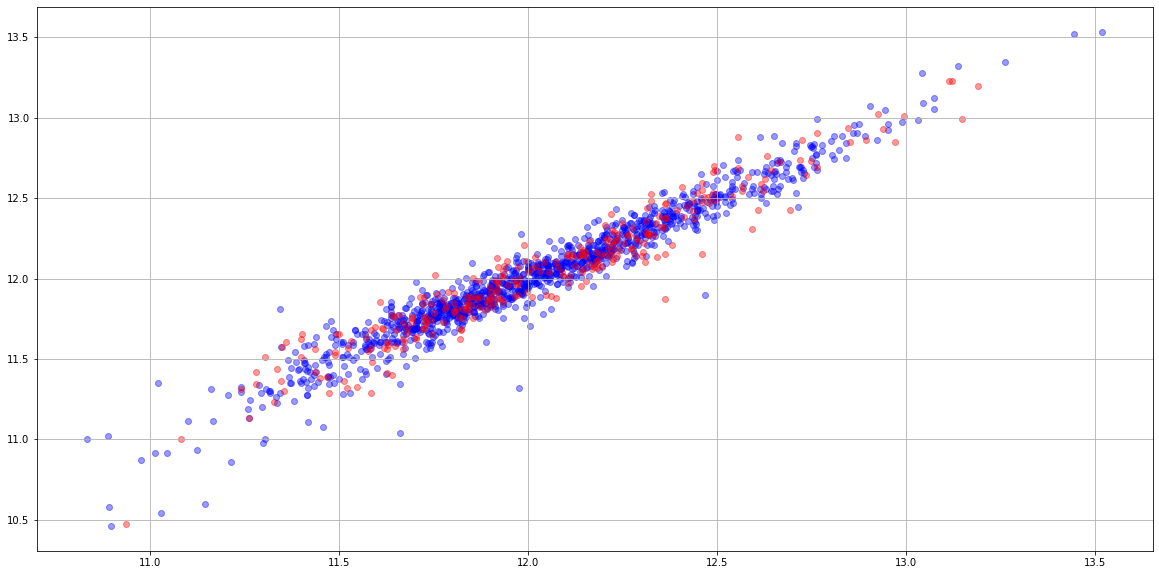

In [17]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_ridge_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_ridge_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [18]:
ridge_coef_strd = pd.Series(gs_ridge_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(ridge_coef_strd.abs().sort_values(ascending=False).to_string())

GrLivArea                                                           0.495558
1stFlrSF                                                            0.396216
OverallQual                                                         0.353599
BsmtFinSF1                                                          0.276943
TotalBsmtSF                                                         0.271261
OverallCond                                                         0.265349
LotArea                                                             0.251726
MSZoning_FV                                                         0.228714
2ndFlrSF                                                            0.210330
MSZoning_RL                                                         0.193947
MSZoning_RH                                                         0.185984
TotRmsAbvGrd                                                        0.174554
FullBath                                                            0.165870

In [19]:
ridge_coef_index_01 = [i for i, x in enumerate(ridge_coef_strd) if abs(x) > 0]

hp_ridge_strd_reduced = hp_full_strd.iloc[:,ridge_coef_index_01]

hp_ridge_strd_reduced

,LotFrontage,LotArea,Street,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_TwnhsI,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MoSold_Aug,MoSold_Dec,MoSold_Feb,MoSold_Jan,MoSold_Jul,MoSold_Jun,MoSold_Mar,MoSold_May,MoSold_Nov,MoSold_Oct,MoSold_Sep,SaleType_CWD,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,YrSold_2006.0,YrSold_2007.0,YrSold_2008.0,YrSold_2009.0,YrSold_2010.0
0,0.150685,0.033420,1.0,0.0,1.0,0.666667,0.500,0.949275,0.883333,0.122500,0.666667,0.50,0.8,0.75,0.25,1.000000,0.176060,0.166667,0.000000,0.064212,0.168008,1.00,1.0

- because Ridge thinks all of the features have some kind of importance, the list is not actually of much value

## Trying w ElasticNet

In [20]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

enet = ElasticNet(random_state=state, max_iter=10000, fit_intercept=True)

# parameters to use
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 0, 1, 10, 100]
l1ratio = [0, 0.25, 0.5, 0.75, 1]
fitintercept = [True, False]
precomputes = [True, False]
warmstart = [True, False]
selections = ['cyclic', 'random']

gparam_enet_1 = {'alpha': alphas,
                  'l1_ratio': l1ratio,
                  'fit_intercept': fitintercept,
                  'precompute': precomputes, 
                  'warm_start': warmstart,
                  'selection': selections,
                  'random_state': [state]}

# setting parameters
gs_enet_1 = ms.GridSearchCV(enet, gparam_enet_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_enet_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_enet_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_enet_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_enet_1, ytrain, xtrain))
test_rmse.append(rmse(gs_enet_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_enet_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
enet_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
enet_res_df = pd.DataFrame(enet_list_results).T
enet_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
enet_res_df = pd.concat([enet_res_df, best_par_df], axis=1, sort=False)

enet_res_df

Wall time: 59.8 s


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,alpha,fit_intercept,l1_ratio,precompute,random_state,selection,warm_start
0,0.928946,0.928199,0.105653,0.110311,-0.004658,0.001,True,0.5,True,0,random,True


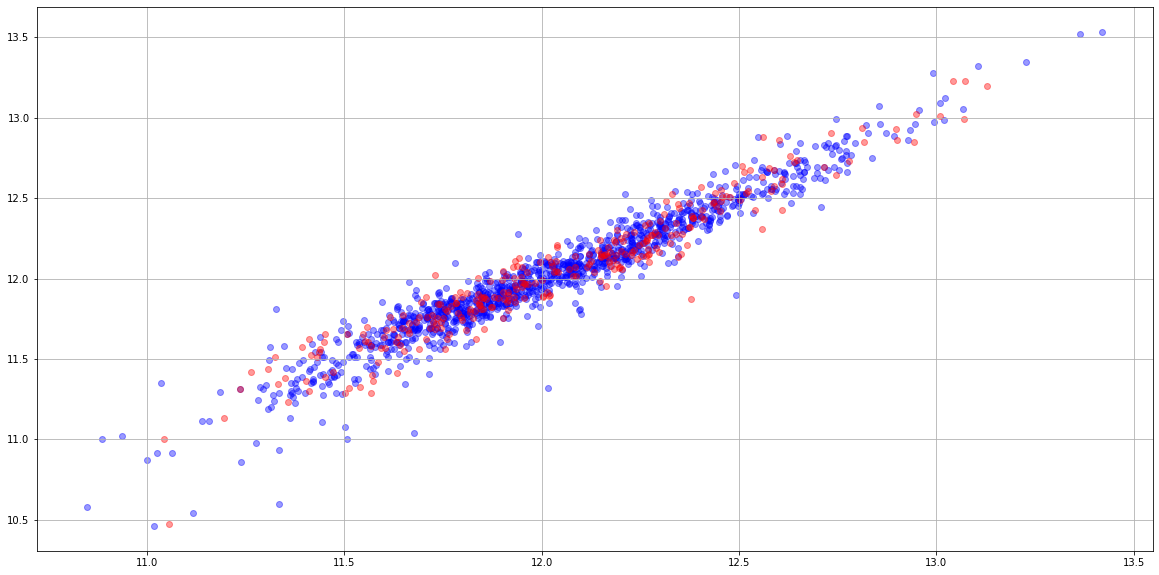

In [21]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_enet_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_enet_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [22]:
enet_coef_strd = pd.Series(gs_enet_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(enet_coef_strd.abs().sort_values(ascending=False).to_string())

GrLivArea                                                           0.789030
OverallQual                                                         0.472259
1stFlrSF                                                            0.311100
TotalBsmtSF                                                         0.267480
OverallCond                                                         0.239606
BsmtFinSF1                                                          0.166293
Functional                                                          0.135590
GarageCars                                                          0.116687
LotArea                                                             0.114432
FullBath                                                            0.112096
2ndFlrSF                                                            0.106898
GarageArea                                                          0.103961
KitchenQual                                                         0.096322

In [23]:
# columns that were dropped by enet

enet_coef_index_00 = [i for i, x in enumerate(enet_coef_strd) if abs(x) == 0]
hp_enet_strd_dropped = hp_full_strd.iloc[:, enet_coef_index_00]
list(hp_enet_strd_dropped.columns)

['Street',
 'Alley',
 'Utilities',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'GarageYrBlt',
 'GarageCond',
 'EnclosedPorch',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'MiscVal',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_1-1/2 STORY PUD - ALL AGES',
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_2-STORY 1946 & NEWER',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'MSSubClass_SPLIT FOYER',
 'MSSubClass_SPLIT OR MULTI-LEVEL',
 'MSZoning_RH',
 'MSZoning_RM',
 'LotShape_IR3',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_Gilbert',
 'Neighborhood_Mitchel',
 'Neighbo

# Tree Models

## Trying w RFR

In [24]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

rfr = RandomForestRegressor()

# parameters to use
# maxdepth = [10, 25, 50, 100, 250, 500]
# minsamlf = [1, 2, 3, 4, 5]
# minsamsplt = [2, 3, 4, 5]
# nestimators = [100, 250, 400, 500]
# oobscore = [True, False]
# warmstart = [True, False]
# 'max_depth': maxdepth,
#               'min_samples_leaf': minsamlf,
#               'min_samples_split': minsamsplt,
#               'n_estimators': nestimators,
#               'oob_score': oobscore,
#               'warm_start': warmstart

gparam_rfr = {}

# setting parameters
gs_rfr = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                           scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_rfr.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_rfr.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_rfr, ytrain, xtrain))
test_rmse.append(rmse(gs_rfr, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_rfr.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
rfr_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

Wall time: 2.86 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE
0,0.981569,0.906173,0.05381,0.126101,-0.07229


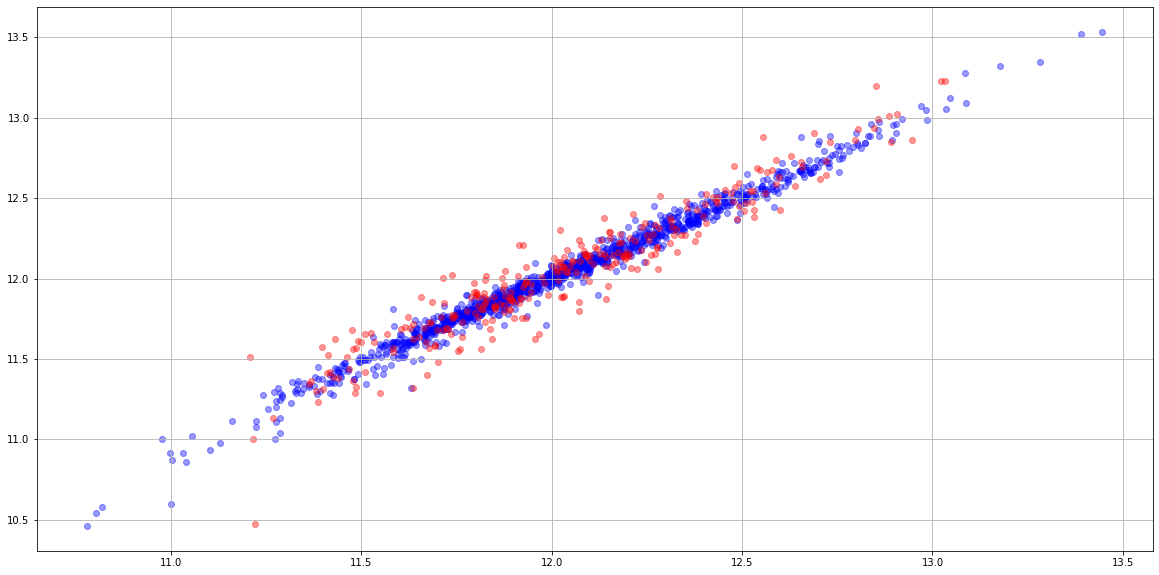

In [25]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_rfr.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [26]:
sorted_importance_rfr = sorted(zip(hp_full_strd.columns,
                                   gs_rfr.best_estimator_.feature_importances_),
                               key=lambda t:t[1], reverse=True)
sorted_importance_rfr

[('OverallQual', 0.5236471926261852),
 ('GrLivArea', 0.11019333873868138),
 ('TotalBsmtSF', 0.044075679031871505),
 ('GarageCars', 0.03760714625417046),
 ('GarageArea', 0.029753364202616348),
 ('1stFlrSF', 0.02233412755360699),
 ('BsmtFinSF1', 0.02137944474813985),
 ('YearBuilt', 0.01762578662243893),
 ('CentralAir', 0.012660674208197796),
 ('OverallCond', 0.011235361402022923),
 ('LotArea', 0.011158936459545809),
 ('YearRemodAdd', 0.00882049773192124),
 ('GarageYrBlt', 0.008284665497335994),
 ('LotFrontage', 0.006696144961917288),
 ('ExterQual', 0.0061247932913948986),
 ('BsmtUnfSF', 0.006072768282576749),
 ('BsmtFinType1', 0.005826146753367559),
 ('BsmtQual', 0.005532443014690727),
 ('GarageFinish', 0.00550068796622478),
 ('2ndFlrSF', 0.005349154002305221),
 ('KitchenQual', 0.005135330122040357),
 ('MSZoning_RM', 0.004534554448766644),
 ('GarageType_Detchd', 0.004309044383050878),
 ('GarageCond', 0.004269346976683213),
 ('OpenPorchSF', 0.003784019548981871),
 ('MasVnrArea', 0.0031301

In [27]:
filtered_sorted_importance_rfr = [x for x in sorted_importance_rfr if x[1]>0]
filtered_sorted_importance_rfr

[('OverallQual', 0.5236471926261852),
 ('GrLivArea', 0.11019333873868138),
 ('TotalBsmtSF', 0.044075679031871505),
 ('GarageCars', 0.03760714625417046),
 ('GarageArea', 0.029753364202616348),
 ('1stFlrSF', 0.02233412755360699),
 ('BsmtFinSF1', 0.02137944474813985),
 ('YearBuilt', 0.01762578662243893),
 ('CentralAir', 0.012660674208197796),
 ('OverallCond', 0.011235361402022923),
 ('LotArea', 0.011158936459545809),
 ('YearRemodAdd', 0.00882049773192124),
 ('GarageYrBlt', 0.008284665497335994),
 ('LotFrontage', 0.006696144961917288),
 ('ExterQual', 0.0061247932913948986),
 ('BsmtUnfSF', 0.006072768282576749),
 ('BsmtFinType1', 0.005826146753367559),
 ('BsmtQual', 0.005532443014690727),
 ('GarageFinish', 0.00550068796622478),
 ('2ndFlrSF', 0.005349154002305221),
 ('KitchenQual', 0.005135330122040357),
 ('MSZoning_RM', 0.004534554448766644),
 ('GarageType_Detchd', 0.004309044383050878),
 ('GarageCond', 0.004269346976683213),
 ('OpenPorchSF', 0.003784019548981871),
 ('MasVnrArea', 0.0031301

## Trying w GBR

In [28]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

gbm = GradientBoostingRegressor()

# learningrate = [0.01, 0.05, 0.1, 0.5, 1] # subsequently, fine tune
# nestimators = [5, 10, 50, 100, 200, 300, 400, 500]
# maxfeatures = [9, 20, 40, 60, 100, 150, 176]
# maxdepth = [1, 2, 3, 4, 5]
# 'learning_rate': learningrate,
#               'n_estimators': nestimators, 
#               'max_features': maxfeatures,
#               'max_depth': maxdepth

gparam_gbm = {}

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_gbm.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_gbm.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_gbm, ytrain, xtrain))
test_rmse.append(rmse(gs_gbm, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_gbm.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
gbm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
gbm_res_df = pd.DataFrame(gbm_list_results).T
gbm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
gbm_res_df = pd.concat([gbm_res_df, best_par_df], axis=1, sort=False)

gbm_res_df

Wall time: 1.16 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE
0,0.961347,0.922834,0.077925,0.114358,-0.036433


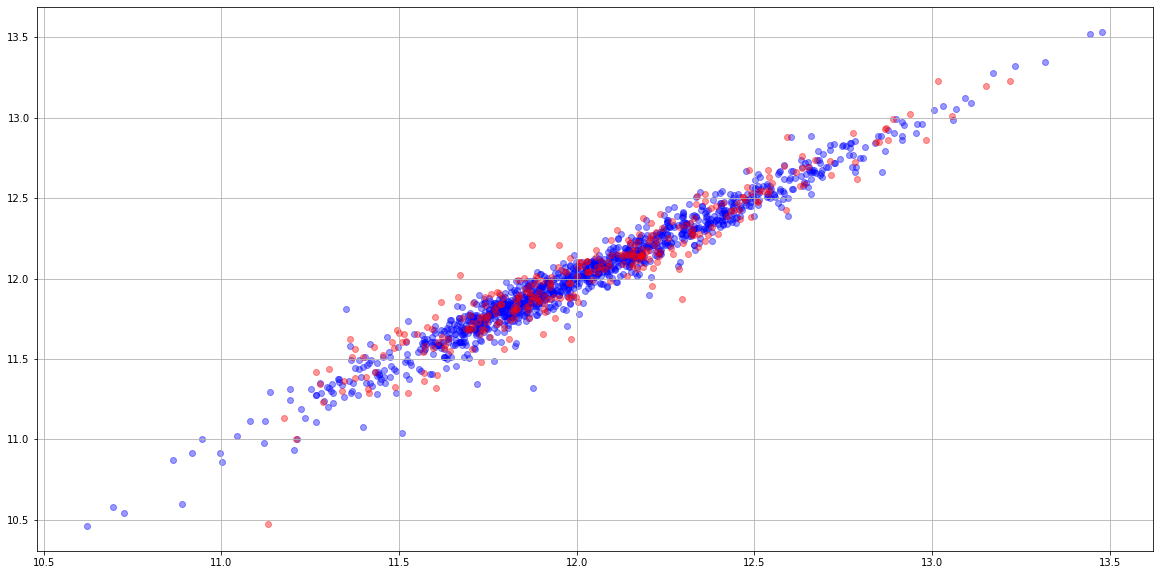

In [29]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [30]:
sorted_importance_gbm = sorted(zip(hp_full_strd.columns,
                                   gs_gbm.best_estimator_.feature_importances_),
                               key=lambda t:t[1], reverse=True)
sorted_importance_gbm

[('OverallQual', 0.39991242221797263),
 ('GrLivArea', 0.17325213581547674),
 ('KitchenQual', 0.06153958426906684),
 ('TotalBsmtSF', 0.04574559466156932),
 ('GarageCars', 0.04095254681398816),
 ('BsmtFinSF1', 0.025407253481426407),
 ('ExterQual', 0.022577335376354788),
 ('YearBuilt', 0.021317423608140307),
 ('BsmtQual', 0.020133574391765795),
 ('YearRemodAdd', 0.019952958392757805),
 ('LotArea', 0.016571789073840635),
 ('OverallCond', 0.015447353808764582),
 ('GarageArea', 0.01426681979926205),
 ('GarageFinish', 0.013930482964756475),
 ('CentralAir', 0.013391161769162434),
 ('1stFlrSF', 0.010516107097418256),
 ('GarageCond', 0.009220277446616205),
 ('Fireplaces', 0.008815286297193406),
 ('MSZoning_RL', 0.0064638214528563755),
 ('FireplaceQu_None', 0.006086619977619958),
 ('GarageYrBlt', 0.004685433882681843),
 ('BsmtFinType1', 0.004357213102204277),
 ('LotFrontage', 0.003055613201635814),
 ('BsmtExposure', 0.002347850067788905),
 ('Functional', 0.002284161648668201),
 ('OpenPorchSF', 0.

In [31]:
filtered_sorted_importance_gbm = [x for x in sorted_importance_gbm if x[1]>0]
filtered_sorted_importance_gbm

[('OverallQual', 0.39991242221797263),
 ('GrLivArea', 0.17325213581547674),
 ('KitchenQual', 0.06153958426906684),
 ('TotalBsmtSF', 0.04574559466156932),
 ('GarageCars', 0.04095254681398816),
 ('BsmtFinSF1', 0.025407253481426407),
 ('ExterQual', 0.022577335376354788),
 ('YearBuilt', 0.021317423608140307),
 ('BsmtQual', 0.020133574391765795),
 ('YearRemodAdd', 0.019952958392757805),
 ('LotArea', 0.016571789073840635),
 ('OverallCond', 0.015447353808764582),
 ('GarageArea', 0.01426681979926205),
 ('GarageFinish', 0.013930482964756475),
 ('CentralAir', 0.013391161769162434),
 ('1stFlrSF', 0.010516107097418256),
 ('GarageCond', 0.009220277446616205),
 ('Fireplaces', 0.008815286297193406),
 ('MSZoning_RL', 0.0064638214528563755),
 ('FireplaceQu_None', 0.006086619977619958),
 ('GarageYrBlt', 0.004685433882681843),
 ('BsmtFinType1', 0.004357213102204277),
 ('LotFrontage', 0.003055613201635814),
 ('BsmtExposure', 0.002347850067788905),
 ('Functional', 0.002284161648668201),
 ('OpenPorchSF', 0.

# Trying w XGBoost

In [32]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

xgb_t = xgboost.XGBRegressor()

# evalmetric = ['rmse']
# njobs = [-1]
# randomstate = [state]
# # booster_ = ['gbtree']

# nestimators = [1, 10, 20, 50, 100]
# minchildweight = [1, 3, 5]
# maxdepth = [1, 3, 5]
# learningrate = [0.01, 0.05, 0.1]
# gamma_ = [0.5, 1, 2, 5]
# subsample_ = [0.8, 1]
# # samplingmethod = ['uniform', 'gradient_based']
# colsamplebytree = [0.8, 1]
# lambda_ = [1, 3, 5]
# alpha_ = [1, 3, 5]
# 'eval_metric': evalmetric,
#                 'n_jobs': njobs,
# #                 'booster': booster_,
#                 'n_estimators': nestimators,
#                 'min_child_weight': minchildweight,
#                 'max_depth': maxdepth,
#                 'eta': learningrate,
#                 'gamma': gamma_,
#                 'subsample': subsample_,
# #                 'sampling_method': samplingmethod,
#                 'colsample_bytree': colsamplebytree,
#                 'lambda': lambda_,
#                 'alpha': alpha_,
#                 'random_state': randomstate


gparam_xgb_t = {}

gs_xgb_t = GridSearchCV(xgb_t, gparam_xgb_t, cv=n_folds, refit=True, verbose=1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_t.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_xgb_t.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_xgb_t.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_xgb_t, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb_t, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_xgb_t.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
xgb_t_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
xgb_t_res_df = pd.DataFrame(xgb_t_list_results).T
xgb_t_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_t_res_df = pd.concat([xgb_t_res_df, best_par_df], axis=1, sort=False)

xgb_t_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 1.22 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE
0,0.999465,0.909787,0.009166,0.123648,-0.114481


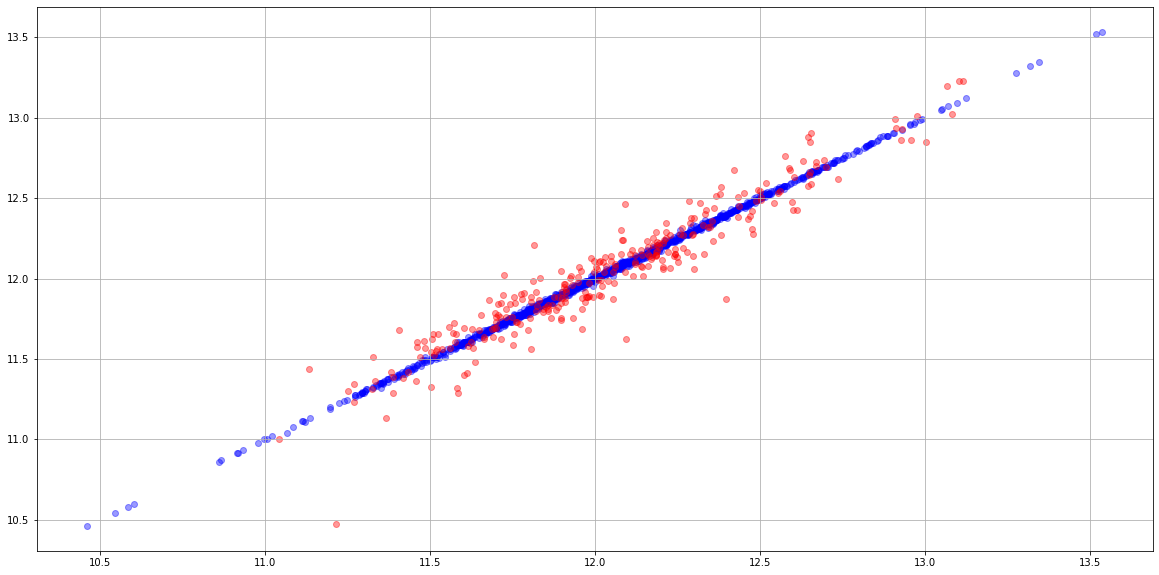

In [33]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_t.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb_t.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [34]:
sorted_importance_xgb_t = sorted(zip(hp_full_strd.columns,
                                   gs_xgb_t.best_estimator_.feature_importances_),
                               key=lambda t:t[1], reverse=True)
sorted_importance_xgb_t

[('GarageCond', 0.1338653),
 ('KitchenQual', 0.10134537),
 ('Fireplaces', 0.09255796),
 ('OverallQual', 0.07467818),
 ('GarageType_Attchd', 0.06175083),
 ('GrLivArea', 0.044273924),
 ('GarageCars', 0.04038635),
 ('MSZoning_RM', 0.03378394),
 ('KitchenAbvGr', 0.02991606),
 ('TotalBsmtSF', 0.024662808),
 ('Neighborhood_Crawfor', 0.0170242),
 ('BsmtQual', 0.014901746),
 ('CentralAir', 0.013934172),
 ('BsmtFinSF1', 0.01374009),
 ('HouseStyle_2.5Unf', 0.010556895),
 ('SaleType_New', 0.009883426),
 ('ExterQual', 0.00963537),
 ('SaleCondition_Normal', 0.008297225),
 ('Street', 0.0075312667),
 ('Functional', 0.007526722),
 ('BsmtFinType1', 0.0071790405),
 ('Condition1_PosA', 0.006344675),
 ('OverallCond', 0.0062542837),
 ('YearBuilt', 0.0061357873),
 ('MoSold_Dec', 0.0059106275),
 ('2ndFlrSF', 0.0057341335),
 ('Neighborhood_NAmes', 0.0055326866),
 ('Neighborhood_MeadowV', 0.0055270535),
 ('Alley', 0.005504112),
 ('LandContour_Low', 0.0051532164),
 ('Neighborhood_StoneBr', 0.004779265),
 ('LotA

In [35]:
filtered_sorted_importance_xgb_t = [x for x in sorted_importance_xgb_t if x[1]>0]
filtered_sorted_importance_xgb_t

[('GarageCond', 0.1338653),
 ('KitchenQual', 0.10134537),
 ('Fireplaces', 0.09255796),
 ('OverallQual', 0.07467818),
 ('GarageType_Attchd', 0.06175083),
 ('GrLivArea', 0.044273924),
 ('GarageCars', 0.04038635),
 ('MSZoning_RM', 0.03378394),
 ('KitchenAbvGr', 0.02991606),
 ('TotalBsmtSF', 0.024662808),
 ('Neighborhood_Crawfor', 0.0170242),
 ('BsmtQual', 0.014901746),
 ('CentralAir', 0.013934172),
 ('BsmtFinSF1', 0.01374009),
 ('HouseStyle_2.5Unf', 0.010556895),
 ('SaleType_New', 0.009883426),
 ('ExterQual', 0.00963537),
 ('SaleCondition_Normal', 0.008297225),
 ('Street', 0.0075312667),
 ('Functional', 0.007526722),
 ('BsmtFinType1', 0.0071790405),
 ('Condition1_PosA', 0.006344675),
 ('OverallCond', 0.0062542837),
 ('YearBuilt', 0.0061357873),
 ('MoSold_Dec', 0.0059106275),
 ('2ndFlrSF', 0.0057341335),
 ('Neighborhood_NAmes', 0.0055326866),
 ('Neighborhood_MeadowV', 0.0055270535),
 ('Alley', 0.005504112),
 ('LandContour_Low', 0.0051532164),
 ('Neighborhood_StoneBr', 0.004779265),
 ('LotA

# Combine the lists of importances

In [36]:
lasso_list = list(hp_lasso_strd_reduced.columns)
enet_list = list(hp_enet_strd_dropped.columns)
rfr_list = [x[0] for x in filtered_sorted_importance_rfr]
gbm_list = [x[0] for x in filtered_sorted_importance_gbm]
xgb_list = [x[0] for x in filtered_sorted_importance_xgb_t]

full_list = list(set(lasso_list + enet_list + rfr_list + gbm_list + xgb_list))
full_list

['MoSold_Feb',
 'LotConfig_FR2',
 'YrSold_2007.0',
 'Neighborhood_Mitchel',
 'RoofStyle_Gable',
 'RoofMatl_Tar&Grv',
 'MasVnrType_BrkFace',
 'MSZoning_FV',
 'MSZoning_RH',
 'Neighborhood_Gilbert',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'HouseStyle_2.5Unf',
 'SaleCondition_Alloca',
 'PavedDrive',
 'Neighborhood_Crawfor',
 'Neighborhood_SawyerW',
 'Exterior2nd_HdBoard',
 'RoofStyle_Hip',
 'Exterior2nd_Other',
 'Condition2_Norm',
 'Exterior1st_Stucco',
 'Exterior1st_MetalSd',
 'GarageType_CarPort',
 'LandContour_Lvl',
 'LandSlope_Sev',
 'LotShape_Reg',
 'SaleCondition_AdjLand',
 'LandContour_Low',
 'SaleType_ConLI',
 'Exterior1st_WdShing',
 'ScreenPorch',
 'LotShape_IR3',
 'LotConfig_Inside',
 'BsmtExposure',
 'OverallQual',
 'Neighborhood_BrDale',
 'RoofMatl_WdShngl',
 'Condition1_Feedr',
 'FireplaceQu_Po',
 'SaleCondition_Partial',
 'Exterior2nd_VinylSd',
 'LotConfig_FR3',
 'Condition2_RRAn',
 'BldgType_TwnhsE',
 'MoSold_May',
 'GarageCond',
 'Exterior1st_CBlock',
 'Ext

In [37]:
pd.DataFrame(lasso_list).to_csv('..\hp_2b_important_feat_lasso.csv')
pd.DataFrame(enet_list).to_csv('..\hp_2b_important_feat_enet.csv')
pd.DataFrame(rfr_list).to_csv('..\hp_2b_important_feat_rfr.csv')
pd.DataFrame(gbm_list).to_csv('..\hp_2b_important_feat_gbr.csv')
pd.DataFrame(xgb_list).to_csv('..\hp_2b_important_feat_xgb.csv')
pd.DataFrame(full_list).to_csv('..\hp_2b_important_feat_full.csv')

In [38]:
test = pd.read_csv('..\hp_2a_ranked_edited_dum_full_test.csv', index_col=0)

# test_lasso_rdc = test[hp_lasso_strd_reduced.columns]

prediction = pd.DataFrame(gs_lasso_1.best_estimator_.predict(test))

prediction = prediction.reset_index()
prediction['index'] = prediction['index'] + 1461
prediction.columns = ['Id', 'SalePrice']
prediction['SalePrice'] = np.exp(prediction['SalePrice'])

prediction.to_csv('oct_try2.csv', index=False, encoding='utf-8')

prediction

#.13288

,Id,SalePrice
0,1461,112060.798339
1,1462,162456.320696
2,1463,174433.032503
3,1464,201410.012688
4,1465,198061.056256
...,...,...
1454,2915,84068.470443
1455,2916,79491.849400
1456,2917,159402.036251
1457,2918,111263.187108
